In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Date,User (hashed),Status,Order (hashed),Item (Hashed),Total
0,3/4/2022,e61dfdf2d7cee7d78bc3b01d301a94b19ed0be0c,Gold,a47e2a3cd6314765d2326d1ee9b7b61e513aaf33,c209ecc0e21d7e58dbd71858c5670bd07d0255ef,18.99
1,3/4/2022,f5a248b9e9dcc1fff254a9ca31b8ca1acc47e088,Blue,9443cb38bd9d8181412ea65a69cf079088669069,3a6de26a377571e879f2f06b1d783f9b141169fc,18.71
2,3/4/2022,e61dfdf2d7cee7d78bc3b01d301a94b19ed0be0c,Gold,a47e2a3cd6314765d2326d1ee9b7b61e513aaf33,c3e55d3d9979ffc62e7de08135b7f788dbfbeb73,9.5
3,3/4/2022,e61dfdf2d7cee7d78bc3b01d301a94b19ed0be0c,Gold,5695d5afb94c402d6f5ead80a8bb32b638beb72b,e2ee2c1514de81e757498e578f16102e3725f537,91.65
4,3/4/2022,c14c2a015d2c48e97d0268c9b9d0e60348746ffc,Blue,1ad957c1c25d0dcd5273d82c4855fd5cb219e000,e2ee2c1514de81e757498e578f16102e3725f537,19.7
...,...,...,...,...,...,...
12180,1/31/2023,b6a3c1b9f5210ce2ce5efa15ea400ef0a2a12a24,Blue,64f858526c86a227e3d58432ff27a2810ebc85ce,87ca2d429fb7189e9a6a7f77eb1e94fc141512a0,0
12181,1/31/2023,b6a3c1b9f5210ce2ce5efa15ea400ef0a2a12a24,Blue,0d5efe636317e00bd7c6a63996d55e75bd08533b,e6b94b1b2c6d9fe7d8805f67242aa8d19ad15333,17.92
12182,1/31/2023,b6a3c1b9f5210ce2ce5efa15ea400ef0a2a12a24,Blue,0d5efe636317e00bd7c6a63996d55e75bd08533b,888cab6034fef2908d7984df968242558428decf,17.92
12183,1/31/2023,2da2b806af37ee90887ef171a91b9932b00fa0e9,Blue,89764c0a128fa678b7f0b6e42c0ef3a4f5ea4068,05982937cf65706f885171a7bcfdd05952cbcae8,4.65


In [4]:
# Cleaning and Preprocessing
df['User (hashed)'] = df['User (hashed)'].astype('category')
df['Order (hashed)'] = df['Order (hashed)'].astype('category')
df['Item (Hashed)'] = df['Item (Hashed)'].astype('category')
df['Status'] = df['Status'].astype('category')
df_clean = df.drop(df[df['Total'] == '-'].index)
df_clean['Total'] = df_clean['Total'].astype(float)
df_clean = df_clean.drop(df_clean[df_clean['Date'] == '#VALUE!'].index)
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%m/%d/%Y')
df_clean['Month'] = df_clean['Date'].dt.to_period('M')
df_clean['Year'] = df_clean['Date'].dt.to_period('Y')
df_clean = df_clean.dropna()

In [5]:
df_clean

,Date,User (hashed),Status,Order (hashed),Item (Hashed),Total,Month,Year
0,2022-03-04,e61dfdf2d7cee7d78bc3b01d301a94b19ed0be0c,Gold,a47e2a3cd6314765d2326d1ee9b7b61e513aaf33,c209ecc0e21d7e58dbd71858c5670bd07d0255ef,18.99,2022-03,2022
1,2022-03-04,f5a248b9e9dcc1fff254a9ca31b8ca1acc47e088,Blue,9443cb38bd9d8181412ea65a69cf079088669069,3a6de26a377571e879f2f06b1d783f9b141169fc,18.71,2022-03,2022
2,2022-03-04,e61dfdf2d7cee7d78bc3b01d301a94b19ed0be0c,Gold,a47e2a3cd6314765d2326d1ee9b7b61e513aaf33,c3e55d3d9979ffc62e7de08135b7f788dbfbeb73,9.50,2022-03,2022
3,2022-03-04,e61dfdf2d7cee7d78bc3b01d301a94b19ed0be0c,Gold,5695d5afb94c402d6f5ead80a8bb32b638beb72b,e2ee2c1514de81e757498e578f16102e3725f537,91.65,2022-03,2022
4,2022-03-04,c14c2a015d2c48e97d0268c9b9d0e60348746ffc,Blue,1ad957c1c25d0dcd5273d82c4855fd5cb219e000,e2ee2c1514de81e757498e578f16102e3725f537,19.70,2022-03,2022
...,...,...,...,...,...,...,...,...
12180,2023-01-31,b6a3c1b9f5210ce2ce5efa15ea400ef0a2a12a24,Blue,64f858526c86a227e3d58432ff27a2810ebc85ce,87ca2d429fb7189e9a6a7f77eb1e94fc141512a0,0.00,2023-01,2023
12181,2023-01-31,b6a3c1b9f5210ce2ce5efa15ea400ef0a2a12a24,Blue,0d5efe636317e00bd7c6a63996d55e75bd08533b,e6b94b1b2c6d9fe7d8805f67242aa8d19ad15333,17.92,2023-01,2023
12182,2023-01-31,b6a3c1b9f5210ce2ce5efa15ea400ef0a2a12a24,Blue,0d5efe636317e00bd7c6a63996d55e75bd08533b,888cab6034fef2908d7984df968242558428decf,17.92,2023-01,2023
12183,2023-01-31,2da2b806af37ee90887ef171a91b9932b00fa0e9,Blue,89764c0a128fa678b7f0b6e42c0ef3a4f5ea4068,05982937cf65706f885171a7bcfdd05952cbcae8,4.65,2023-01,2023


# Purchases in Each Month

In [6]:
df_clean['Month'].value_counts().sort_index()

2022-03     189
2022-04     173
2022-05     208
2022-06     309
2022-07     682
2022-08     896
2022-09    1378
2022-10    1621
2022-11    1371
2022-12    2014
2023-01    1872
Freq: M, Name: Month, dtype: int64

# Categorical Data Summary

In [7]:
categorical_columns = ['User (hashed)', 'Status', 'Order (hashed)', 'Item (Hashed)']
df_clean[categorical_columns].describe()

,User (hashed),Status,Order (hashed),Item (Hashed)
count,10713,10713,10713,10713
unique,2939,4,6521,706
top,73eb154014db481e7364713a8d825aecee67c851,Blue,221c2b865a602290d9fbd9e4221335c4d2588c17,74e93162b915769aa4a431f3eeeaae68ec0002e4
freq,194,8251,15,1164


# Numeric Data Summary

In [8]:
df_clean['Total'].describe()

count    10713.000000
mean       119.904781
std        391.624033
min          0.000000
25%          9.950000
50%         17.720000
75%         38.660000
max      10779.260000
Name: Total, dtype: float64

# Percent of users ordering more than once

In [9]:
n_orders = df_clean.groupby(['User (hashed)'])['Order (hashed)'].nunique()
np.sum(n_orders > 1) / df['User (hashed)'].nunique()*100 # todo check time gap

33.748055987558324

<AxesSubplot: xlabel='Order (hashed)', ylabel='Count'>

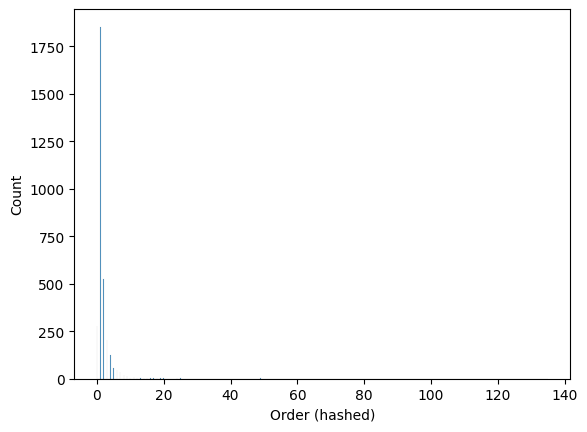

In [10]:
sns.histplot(n_orders)

<AxesSubplot: xlabel='Order (hashed)', ylabel='Count'>

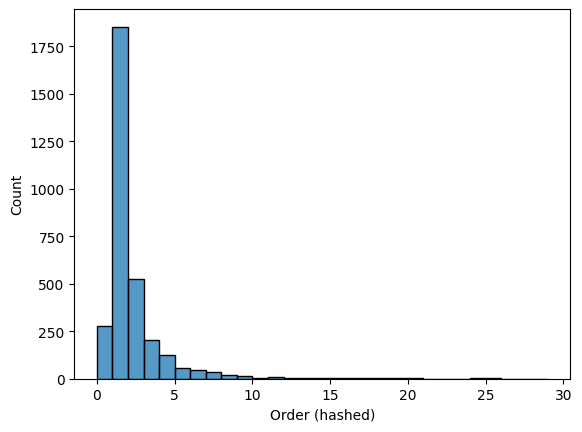

In [11]:
sns.histplot(n_orders, bins=range(30))

# Cohort Analysis

In [12]:
df_clean['order_month'] = df_clean['Date'].dt.to_period('M')
df_clean['cohort'] = df_clean.groupby(['User (hashed)'])['Date'].transform(min).dt.to_period('M')

In [13]:
def analysis_functions(df):
    n_customers = df['User (hashed)'].nunique()
    n_orders = df['Order (hashed)'].nunique()
    n_items = df['Item (Hashed)'].count()
    total_revenue = df['Total'].sum()
    # Note feel free to add more functions here
    data = {
        'n_customers': n_customers,
        'n_orders': n_orders,
        'n_items': n_items,
        'total_revenue': total_revenue
    }
    return pd.Series(data)

In [14]:
df_cohort = df_clean.groupby(['cohort', 'order_month']).apply(analysis_functions).reset_index()
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(lambda x: x.n)
df_cohort

,cohort,order_month,n_customers,n_orders,n_items,total_revenue,period_number
0,2022-03,2022-03,65.0,150.0,189.0,8506.03,0
1,2022-03,2022-04,6.0,27.0,27.0,591.31,1
2,2022-03,2022-05,4.0,17.0,18.0,1052.52,2
3,2022-03,2022-06,5.0,15.0,17.0,2081.72,3
4,2022-03,2022-07,7.0,32.0,36.0,9604.30,4
...,...,...,...,...,...,...,...
61,2022-11,2022-12,37.0,74.0,153.0,10151.33,1
62,2022-11,2023-01,13.0,29.0,71.0,3209.46,2
63,2022-12,2022-12,423.0,556.0,1311.0,146436.28,0
64,2022-12,2023-01,13.0,23.0,60.0,2236.35,1


In [15]:
def plot_heatmap(column, percent=False, **kwargs):
    df_cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values=column)
    if percent:
        series_size = df_cohort_pivot.iloc[:,0]
        df_cohort_pivot = df_cohort_pivot.divide(series_size, axis=0)
    fig, ax = plt.subplots(1, 1)
    sns.heatmap(df_cohort_pivot, ax=ax, **kwargs)
    return ax

### Customer Retention

<AxesSubplot: xlabel='period_number', ylabel='cohort'>

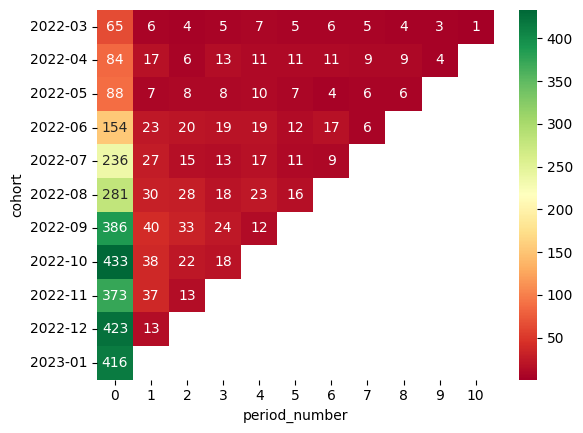

In [16]:
plot_heatmap('n_customers', percent=False, annot=True, cmap='RdYlGn', fmt='g')

### Customer Retention (%)

<AxesSubplot: xlabel='period_number', ylabel='cohort'>

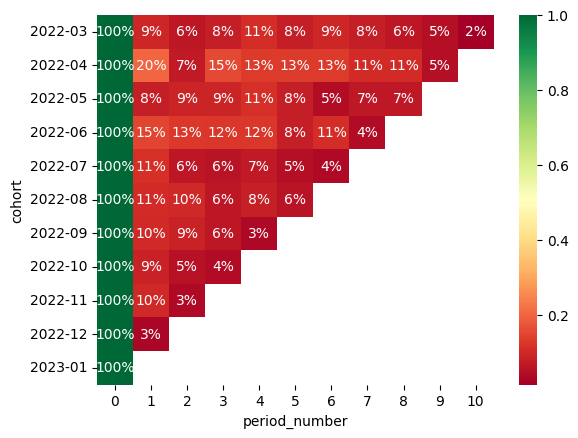

In [17]:
plot_heatmap('n_customers', percent=True, annot=True, cmap='RdYlGn', fmt='.0%')

### Number of Orders

<AxesSubplot: xlabel='period_number', ylabel='cohort'>

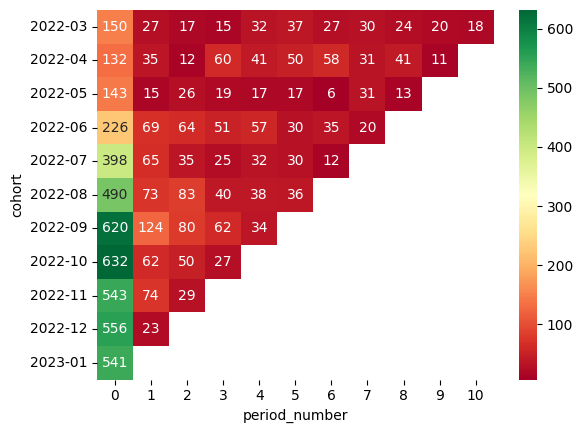

In [18]:
plot_heatmap('n_orders', annot=True, cmap='RdYlGn', fmt='g')

### Number of Items

<AxesSubplot: xlabel='period_number', ylabel='cohort'>

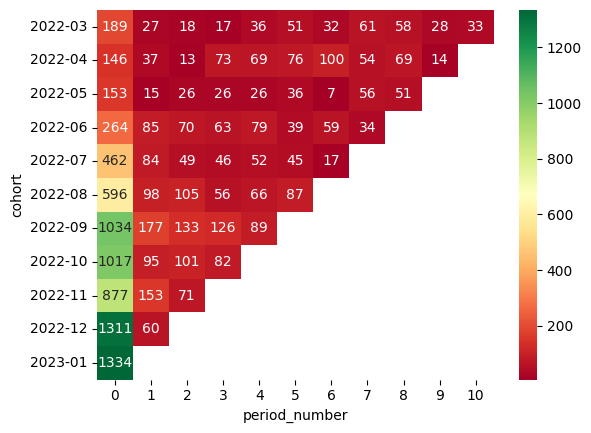

In [19]:
plot_heatmap('n_items', annot=True, cmap='RdYlGn', fmt='g')

<AxesSubplot: xlabel='period_number', ylabel='cohort'>

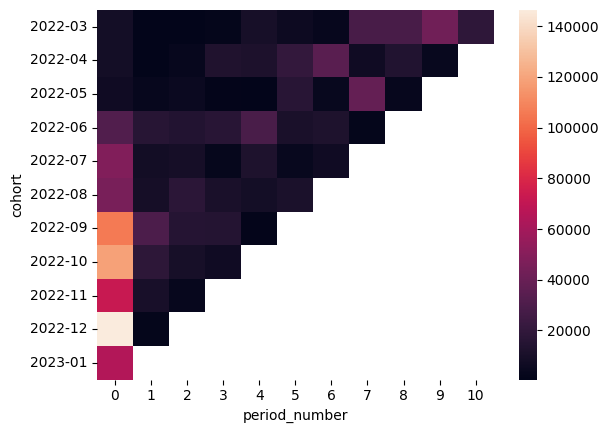

In [20]:
plot_heatmap('total_revenue')

In [21]:
df_cohort.pivot_table(index='cohort', columns='period_number', values='total_revenue')

period_number,0,1,2,3,4,5,6,7,8,9,10
cohort,,,,,,,,,,,
2022-03,8506.03,591.31,1052.52,2081.72,9604.30,5329.84,3081.27,28371.29,28278.14,42271.73,18534.9
2022-04,8458.80,986.77,3294.52,13055.30,11481.81,20280.92,34757.10,6780.19,13295.13,3929.12,NaN
2022-05,6486.03,3273.27,4718.28,1339.86,1062.40,16364.78,3908.07,38465.01,3398.34,NaN,NaN
2022-06,31651.73,15714.39,14005.88,16204.71,29063.40,10629.38,12098.38,2209.97,NaN,NaN,NaN
2022-07,47942.26,7871.37,8608.47,2374.90,12032.90,3621.42,6506.87,NaN,NaN,NaN,NaN
2022-08,45270.88,8734.29,17317.21,10682.59,8317.05,11394.52,NaN,NaN,NaN,NaN,NaN
2022-09,105878.86,29732.12,15293.02,14597.81,1651.53,NaN,NaN,NaN,NaN,NaN,NaN
2022-10,118959.63,17753.76,9624.74,6513.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11,72246.03,10151.33,3209.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
